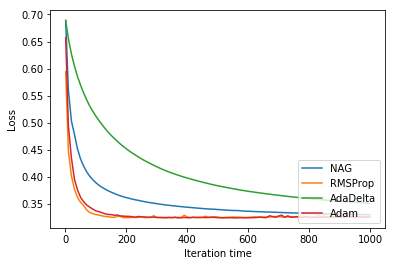

In [5]:
import numpy as np
import math
import time
from numpy import *
import sklearn 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train,y_train = load_svmlight_file("a9a")
X_test,y_test = load_svmlight_file("a9a.t",n_features = 123)

X_train = X_train.toarray()
X_test = X_test.toarray()

#add 1 to end of X matrix
X_tmp = ones(X_train.shape[0]) 
X_train = np.c_[X_train,X_tmp]

X_tmp = ones(X_test.shape[0])
X_test = np.c_[X_test,X_tmp]

y_train = y_train
y_test = y_test

for i in range(y_train.shape[0]):
    if y_train[i] == -1:
        y_train[i] = 0

for i in range(y_test.shape[0]):
    if y_test[i] == -1:
        y_test[i] = 0

#parameters
n = X_train.shape[1]
eps = 1e-8

#if the matrix contains only one element,get it as a number
def ele(t):
    return np.array(t)[0]

#gradient
def h(X,w,i):
    t = mat(X[i])*w
    return 1/(1+math.exp(-ele(t)))

def grad(X,y,w):
    t = mat(zeros((n,1)))
    ran = np.random.randint(1,X.shape[0],300)
    for i in ran:
        t += (h(X,w,i)-y[i])*mat(X[i]).T
    t /= ran.shape[0]
    return t

def accur(X,y,w):
    ret = 0
    for i in range(y.shape[0]):
        t = 0
        if h(X,w,i) >= 0.5:
            t = 1
        if t == y[i]:
            ret += 1
    return ret/y.shape[0]
    

def loss(X,y,w):
    ret = 0
    for i in range(y.shape[0]):
        ret += y[i]*math.log(h(X,w,i))+(1-y[i])*math.log(1-h(X,w,i))
    return -ret/y.shape[0]


iter_time = 1000

gap = 10

def NAG():

    NAG_x = []
    NAG_y = []
    
    NAG_w = mat(zeros((n,1)))
    NAG_v = mat(zeros((n,1)))
    NAG_gama = 0.9
    NAG_nita = 0.01

    iter_cnt = 0
    
    while iter_cnt < iter_time:
        iter_cnt += 1
        g = grad(X_train,y_train,NAG_w)
        NAG_v = NAG_gama*NAG_v + NAG_nita*g
        NAG_w -= NAG_v
        
        if iter_cnt % gap == 0 or iter_cnt == 1:
            NAG_x.append(iter_cnt)
            NAG_y.append(loss(X_test,y_test,NAG_w))

    plt.plot(NAG_x,NAG_y,label = "NAG")

def RMS():

    RMS_x = []
    RMS_y = []

    RMS_w = mat(zeros((n,1)))
    RMS_G = mat(zeros((n,1)))
    RMS_gama = 0.9
    RMS_nita = 0.01

    iter_cnt = 0

    while iter_cnt < iter_time:
        iter_cnt += 1
        g = grad(X_train,y_train,RMS_w)
        RMS_G = RMS_gama*RMS_G + (1-RMS_gama)*np.multiply(g,g)
        RMS_w -= np.multiply(RMS_nita/np.sqrt(RMS_G+eps),g)

        if iter_cnt % gap == 0 or iter_cnt == 1:
            RMS_x.append(iter_cnt)
            RMS_y.append(loss(X_test,y_test,RMS_w))

    plt.plot(RMS_x,RMS_y,label = "RMSProp")

def AdaDelta():

    AdaD_x = []
    AdaD_y = []

    AdaD_w = mat(zeros((n,1)))
    AdaD_G = mat(zeros((n,1)))
    AdaD_t = mat(zeros((n,1)))
    AdaD_gama = 0.99

    iter_cnt = 0

    while iter_cnt < iter_time:
        iter_cnt += 1
        g = grad(X_train,y_train,AdaD_w)
        AdaD_G = AdaD_gama*AdaD_G + (1-AdaD_gama)*np.multiply(g,g)
        t = -np.multiply(np.sqrt(AdaD_t+eps)/np.sqrt(AdaD_G+eps),g)
        AdaD_w += t
        AdaD_t = AdaD_gama*AdaD_t + (1-AdaD_gama)*np.multiply(t,t)

        if iter_cnt % gap == 0 or iter_cnt == 1:
            AdaD_x.append(iter_cnt)
            AdaD_y.append(loss(X_test,y_test,AdaD_w))
    
    plt.plot(AdaD_x,AdaD_y,label = "AdaDelta")


def Adam():

    Adam_x = []
    Adam_y = []

    Adam_w = mat(zeros((n,1)))
    Adam_m = mat(zeros((n,1)))
    Adam_G = mat(zeros((n,1)))
    Adam_gama = 0.999
    Adam_nita = 0.01
    Adam_beta = 0.9

    iter_cnt = 0

    while iter_cnt < iter_time :
        iter_cnt += 1
        g = grad(X_train,y_train,Adam_w)
        Adam_m = Adam_beta*Adam_m + (1-Adam_beta)*g
        Adam_G = Adam_gama*Adam_G + (1-Adam_gama)*np.multiply(g,g)
        alpha = Adam_nita*math.sqrt(1-pow(Adam_gama,iter_cnt))/(1-pow(Adam_beta,iter_cnt))
        Adam_w -= alpha*Adam_m/np.sqrt(Adam_G+eps)

        if iter_cnt % gap == 0 or iter_cnt == 1:
            Adam_x.append(iter_cnt)
            Adam_y.append(loss(X_test,y_test,Adam_w))

    plt.plot(Adam_x,Adam_y,label = "Adam")


NAG()
RMS()
AdaDelta()
Adam()
    
plt.legend(loc = 'upper right')
plt.xlabel("Iteration time")
plt.ylabel("Loss")

plt.show()

